# Time Series - Housing Market

The goal of the project is to use a dataset from Zillow ('zillow_data.csv' in this repo) to analyze, model, and predict returns in order to recommend the best 5 zipcodes to invest in Gwinnett County, Georgia.

## 1. Packages/Libraries and Dataset

In [1]:
# import necessary packages
import pandas as pd
import seaborn as sns
sns.set_context('paper')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima.arima import auto_arima
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('zillow_data.csv')
pd.set_option('display.max_columns', None) 
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [3]:
# check number of rows and columns
df.shape

(14723, 272)

## 2. Scrub & Explore

In [4]:
# rename RegionName to Zipcode
df.rename(columns = {'RegionName':'Zipcode'}, inplace = True)

In [5]:
# filter location to Gwinnett County
gwinnett = df[(df['State'] == 'GA') & (df['CountyName'] == 'Gwinnett')]
print('Number of Zipcodes in Gwinnett County Dataset:', gwinnett['Zipcode'].nunique())

Number of Zipcodes in Gwinnett County Dataset: 16


In [6]:
# view gwinnett dataframe
gwinnett.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
42,70829,30044,Lawrenceville,GA,Atlanta,Gwinnett,43,111400.0,111800.0,112200.0,112500.0,112900.0,113300.0,113600.0,113800.0,114100.0,114400.0,114500.0,114600.0,114700.0,114800.0,115000.0,115100.0,115300.0,115600.0,115900.0,116300.0,116800.0,117400.0,117900.0,118300.0,118700.0,119100.0,119500.0,119800.0,120200.0,120600.0,121000.0,121500.0,122000.0,122600.0,123300.0,123900.0,124500.0,125200.0,125900.0,126600.0,127200.0,127800.0,128500.0,129200.0,129800.0,130500.0,131200.0,131900.0,132500.0,133200.0,133900.0,134600.0,135200.0,136000.0,136700.0,137400.0,138100.0,138700.0,139300.0,139800.0,140400.0,140800.0,141300.0,141700.0,142200.0,142500.0,143000.0,143400.0,143900.0,144500.0,145000.0,145700.0,146300.0,147000.0,147500.0,148200.0,148700.0,149300.0,149800.0,150200.0,150700.0,151200.0,151600.0,151900.0,152300.0,152500.0,152700.0,152900.0,153100.0,153400.0,153700.0,153900.0,154200.0,154300.0,154500.0,154700.0,154900.0,155200.0,155500.0,155900.0,156200.0,156600.0,157000.0,157400.0,157800.0,158300.0,158700.0,159100.0,159300.0,159500.0,159600.0,159700.0,159900.0,160300.0,160800.0,161300.0,161700.0,162200.0,162700.0,163300.0,163900.0,164500.0,165000.0,165500.0,165900.0,166300.0,166700.0,166800.0,166800.0,166800.0,166700.0,166700.0,166700.0,166600.0,166300.0,166100.0,166000.0,165900.0,165500.0,164800.0,163800.0,162700.0,161400.0,160300.0,159400.0,158200.0,156700.0,155100.0,153500.0,152200.0,150800.0,149200.0,147500.0,145900.0,144000.0,142100.0,140200.0,138200.0,136000.0,134100.0,132600.0,131600.0,130400.0,129200.0,128200.0,127800.0,127600.0,126000.0,123200.0,121300.0,120800.0,120200.0,119100.0,117300.0,115900.0,115100.0,113900.0,111800.0,109600.0,108100.0,107000.0,105400.0,103300.0,101100.0,98600.0,95600.0,92300.0,89400.0,87700.0,86500.0,85000.0,83600.0,83000.0,83000.0,83100.0,83100.0,83200.0,83600.0,84500

In [7]:
# check for null values
pd.set_option('display.max_rows', None) 
gwinnett.isna().sum()

RegionID      0
Zipcode       0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
1998-02       0
1998-03       0
1998-04       0
1998-05       0
1998-06       0
1998-07       0
1998-08       0
1998-09       0
1998-10       0
1998-11       0
1998-12       0
1999-01       0
1999-02       0
1999-03       0
1999-04       0
1999-05       0
1999-06       0
1999-07       0
1999-08       0
1999-09       0
1999-10       0
1999-11       0
1999-12       0
2000-01       0
2000-02       0
2000-03       0
2000-04       0
2000-05       0
2000-06       0
2000-07       0
2000-08       0
2000-09       0
2000-10       0
2000-11 

In [8]:
# make a copy of gwinnett dataframe
gwinnett_copy = gwinnett.copy()
gwinnett_copy.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
42,70829,30044,Lawrenceville,GA,Atlanta,Gwinnett,43,111400.0,111800.0,112200.0,112500.0,112900.0,113300.0,113600.0,113800.0,114100.0,114400.0,114500.0,114600.0,114700.0,114800.0,115000.0,115100.0,115300.0,115600.0,115900.0,116300.0,116800.0,117400.0,117900.0,118300.0,118700.0,119100.0,119500.0,119800.0,120200.0,120600.0,121000.0,121500.0,122000.0,122600.0,123300.0,123900.0,124500.0,125200.0,125900.0,126600.0,127200.0,127800.0,128500.0,129200.0,129800.0,130500.0,131200.0,131900.0,132500.0,133200.0,133900.0,134600.0,135200.0,136000.0,136700.0,137400.0,138100.0,138700.0,139300.0,139800.0,140400.0,140800.0,141300.0,141700.0,142200.0,142500.0,143000.0,143400.0,143900.0,144500.0,145000.0,145700.0,146300.0,147000.0,147500.0,148200.0,148700.0,149300.0,149800.0,150200.0,150700.0,151200.0,151600.0,151900.0,152300.0,152500.0,152700.0,152900.0,153100.0,153400.0,153700.0,153900.0,154200.0,154300.0,154500.0,154700.0,154900.0,155200.0,155500.0,155900.0,156200.0,156600.0,157000.0,157400.0,157800.0,158300.0,158700.0,159100.0,159300.0,159500.0,159600.0,159700.0,159900.0,160300.0,160800.0,161300.0,161700.0,162200.0,162700.0,163300.0,163900.0,164500.0,165000.0,165500.0,165900.0,166300.0,166700.0,166800.0,166800.0,166800.0,166700.0,166700.0,166700.0,166600.0,166300.0,166100.0,166000.0,165900.0,165500.0,164800.0,163800.0,162700.0,161400.0,160300.0,159400.0,158200.0,156700.0,155100.0,153500.0,152200.0,150800.0,149200.0,147500.0,145900.0,144000.0,142100.0,140200.0,138200.0,136000.0,134100.0,132600.0,131600.0,130400.0,129200.0,128200.0,127800.0,127600.0,126000.0,123200.0,121300.0,120800.0,120200.0,119100.0,117300.0,115900.0,115100.0,113900.0,111800.0,109600.0,108100.0,107000.0,105400.0,103300.0,101100.0,98600.0,95600.0,92300.0,89400.0,87700.0,86500.0,85000.0,83600.0,83000.0,83000.0,83100.0,83100.0,83200.0,83600.0,84500

In [9]:
# drop some unnecessary columns
gwinnett_copy = gwinnett_copy.drop(['RegionID', 'State', 'City', 'Metro', 'CountyName','SizeRank'], axis=1)

In [10]:
# create function to melt data and make it into time series
def melt_data(df):
    
    '''Takes a dataframe with datetime data that is in wide format and melts it into long format'''
    
    melted = pd.melt(df, id_vars=['Zipcode'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [11]:
# use the function we just created above
gwinnett_melted = melt_data(gwinnett_copy)
gwinnett_melted.head()

,Zipcode,time,value
0,30044,1996-04-01,111400.0
1,30043,1996-04-01,135200.0
2,30096,1996-04-01,119700.0
3,30024,1996-04-01,179600.0
4,30052,1996-04-01,114900.0


In [12]:
# set index with time
gwinnett_melted = gwinnett_melted.set_index('time')
gwinnett_melted.tail()

,Zipcode,value
time,,
2018-04-01,30092,367900.0
2018-04-01,30046,172400.0
2018-04-01,30078,196300.0
2018-04-01,30045,209300.0
2018-04-01,30017,243000.0


(array([ 50000., 100000., 150000., 200000., 250000., 300000., 350000.,
        400000., 450000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

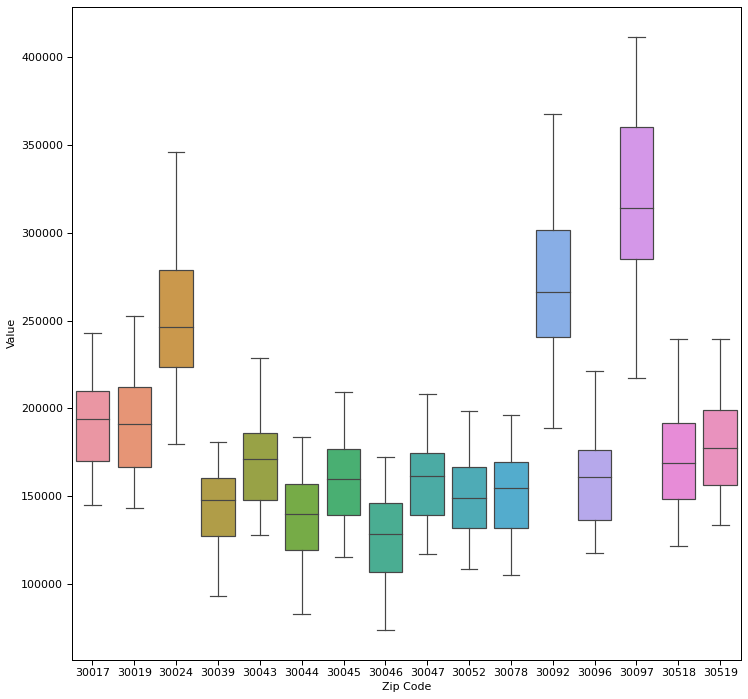

In [13]:
# plot zipcodes vs. value
fig, ax = plt.subplots(figsize = (12,12))
sns.boxplot(x = 'Zipcode', y = 'value', data = gwinnett_melted, ax = ax)
plt.xticks(fontsize = 11)
plt.xlabel('Zip Code', fontsize = 11)
plt.ylabel('Value', fontsize = 11)
plt.yticks(fontsize = 11)

In [14]:
# group data by zipcode
gwinnett_grouped = gwinnett_melted.groupby(['Zipcode'], as_index = True).resample('M').sum()
gwinnett_grouped.drop(columns = 'Zipcode', inplace = True)
gwinnett_grouped.head()

value
Zipcode time                
30017   1996-04-30  144800.0
        1996-05-31  145500.0
        1996-06-30  146200.0
        1996-07-31  146900.0
        1996-08-31  147400.0

In [15]:
gwinnett_grouped.shape

(4240, 1)

## 3. Analysis & Models

### Functions

In [16]:
# stationarity check with Dickey-Fuller test

def stationarity_check(ts):
    '''Takes time series dataframe and returns with results for Dickey-Fuller test'''
    dftest = adfuller(ts.dropna())
    print('\nResults of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [17]:
# decompose time series so we can observe trend, seasionality, and residuals

def decomposition(ts):
    '''Takes time series dataframe and decompose it in order to observe trend, seasonality, and residuals'''
    decomposition = seasonal_decompose(ts)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    plt.figure(figsize=(10,7))
    plt.subplot(511)
    plt.plot(ts, label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(512)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(513)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(514)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

In [18]:
# calculates the residual in order to do stationary test
def residual(ts):
    '''Takes time series dataframe and return residuals.
    Helpful to complete stationary test later'''
    decomposition = seasonal_decompose(ts)
    residual = decomposition.resid
    residual.dropna(inplace=True)
    return residual

In [19]:
# run auto arima and search for the best parameters and then using SARIMAX to fit our models

def best_parameters(ts):
    '''Enter time series,
    Auto_arima will run to search for hyperparameters,
    SARIMAX will fit hyperparameters to get the best model'''
    best_orders = pm.auto_arima(ts, start_p = 0, start_q = 0, max_p = 4, max_q = 4, m = 12, seasonal = True, 
                                   stationary = False, stepwise = True, trend = 'ct', suppress_warnings = True, 
                                   trace = False, error_action = 'ignore')
    best_model = SARIMAX(ts, order = best_orders.order, seasonal_order = best_orders.seasonal_order).fit()
    best_parameters = []
    best_parameters.append([best_orders.order, best_orders.seasonal_order, best_model.aic]) 
    print('ARIMA {} x {}, AIC Calculated: {}'.format(best_orders.order, best_orders.seasonal_order, best_model.aic))
    print(best_model.summary())
    return best_model

In [20]:
# get predictions for the best model
def get_predictions(ts, model, steps=60, plot=True, show=True):
    '''Enter time series and model,
    Gets one-step-ahead forecast for model,
    Calculates Root of Mean Squared Error,
    Makes future predictions for number of steps passed as parameter (default is 60 or 5 years), 
    Plots results, 
    Provides forecasted value with confidence interval'''
    
    # Get preditions from model for the last 20% of data period
    pred = model.get_prediction(start='2013-11-30', dynamic=False)
    conf = pred.conf_int()

    # Plot observed and predicted values with confidence interval
    if plot:
        ax = ts['1996':].plot(label='Observed', figsize=(8, 8))
        pred.predicted_mean.plot(ax=ax, label='One-step-ahead Forecast', alpha=.5)
        ax.fill_between(conf.index,
                        conf.iloc[:, 0],
                        conf.iloc[:, 1], color='g', alpha=.3,
                        label='Confidence Interval')
        ax.set_ylabel('Value')
        ax.set_xlabel('Year')
        plt.title('Observations vs Predictions')
        ax.legend()
        plt.show()
        
    # Compare real and predicted values to validade model and compute the rmse
    predicted = pred.predicted_mean
    real = ts['2017-01-01':].value
    mse = np.square(np.subtract(real,predicted)).mean()
    rmse = math.sqrt(mse)
    
    if show:
        print(f'The RMSE of our forecast is {round(rmse, 2)}.' + '\n')
        
    # Get forecast and confidence interval for steps ahead in future
    future = model.get_forecast(steps=steps, dynamic=True)
    future_conf = future.conf_int()

    # Plot future forecast with confidence interval
    if plot:
        ax = ts['1996':].plot(label='Observed', figsize=(8, 8))
        future.predicted_mean.plot(ax=ax, label='Forecast')
        ax.fill_between(future_conf.index,
                        future_conf.iloc[:, 0],
                        future_conf.iloc[:, 1], color='g', alpha=.3)
        ax.fill_betweenx(ax.get_ylim(), 
                         pd.to_datetime('2023-04-30'), 
                         predicted.index[-1], alpha=.1, zorder=-1)
        ax.set_xlabel('Year')
        ax.set_ylabel('Value')
        plt.title('Future Forecast')
        ax.legend()
        plt.show()
        
    # show prediction for end of step-period (in this case in 5 years future time)
    forecast = future.predicted_mean[-1]
    upper = future_conf.iloc[-1,1]
    lower = future_conf.iloc[-1,0]
    predictions = {}
    predictions['forecast'] = forecast
    predictions['upper'] = upper
    predictions['lower'] = lower
    predictions = pd.DataFrame.from_dict(predictions, orient='index', columns=['Return at End of Forecast'])
  
    # calculate return percentages
    price_2018 = ts.loc['2018-04-30']
    forecast_2023 = forecast
    forecast_lower = lower
    forecast_upper = upper
    return_percentage_predictions = {}
    predicted_percent_change = ((forecast_2023- price_2018) / price_2018)*100
    best_percent_change = ((forecast_upper - price_2018) / price_2018)*100
    worst_percent_change = ((forecast_lower - price_2018) / price_2018)*100
    return_percentage_predictions['predicted_percent_change'] = predicted_percent_change
    return_percentage_predictions['best_case'] = best_percent_change
    return_percentage_predictions['worst_case'] = worst_percent_change
    return_percentage_predictions = pd.DataFrame.from_dict(return_percentage_predictions,orient='index')
    
    if show:
        print(predictions)  
        print(return_percentage_predictions)

### Zipcode 1: 30017

In [21]:
zip_30017 = gwinnett_grouped.loc[30017]
zip_30017.head()

,value
time,
1996-04-30,144800.0
1996-05-31,145500.0
1996-06-30,146200.0
1996-07-31,146900.0
1996-08-31,147400.0


In [22]:
zip_30017.tail()

,value
time,
2017-12-31,237400.0
2018-01-31,238200.0
2018-02-28,239300.0
2018-03-31,241200.0
2018-04-30,243000.0


In [23]:
stationarity_check_30017 = stationarity_check(zip_30017)


Results of Dickey-Fuller Test: 

Test Statistic                  -2.102507
p-value                          0.243508
#Lags Used                      10.000000
Number of Observations Used    254.000000
Critical Value (1%)             -3.456360
Critical Value (5%)             -2.872987
Critical Value (10%)            -2.572870
dtype: float64


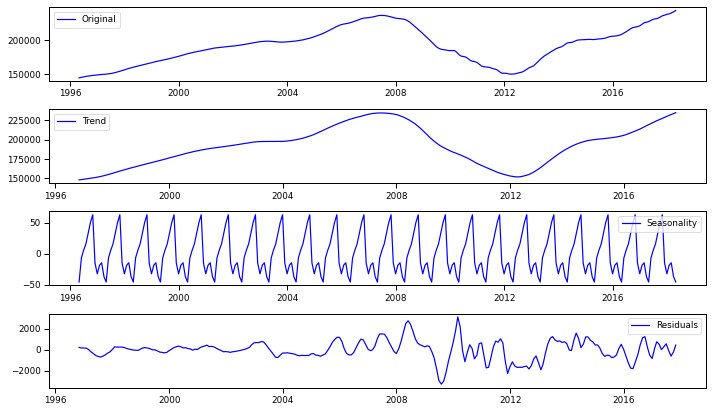

In [24]:
decomposition_30017 = decomposition(zip_30017)

In [25]:
stationarity_check_30017_residual = stationarity_check(residual(zip_30017))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.671960
p-value                          0.000095
#Lags Used                       9.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


In [26]:
best_30017 = best_parameters(zip_30017)

ARIMA (4, 1, 0) x (1, 0, 0, 12), AIC Calculated: 4497.799966827941
                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  265
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2242.900
Date:                            Sun, 22 May 2022   AIC                           4497.800
Time:                                    11:32:27   BIC                           4519.256
Sample:                                04-30-1996   HQIC                          4506.422
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0489      0.004     12.184    

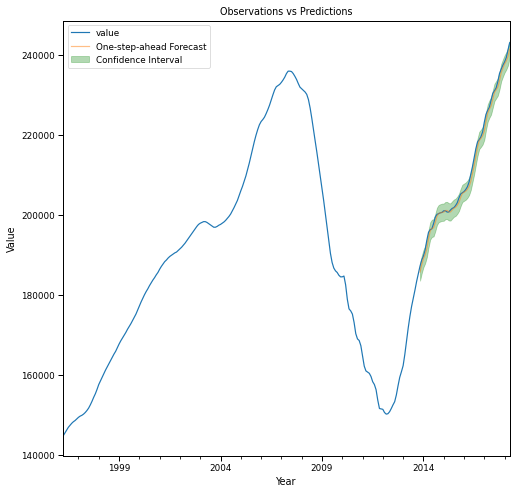

The RMSE of our forecast is 1267.28.



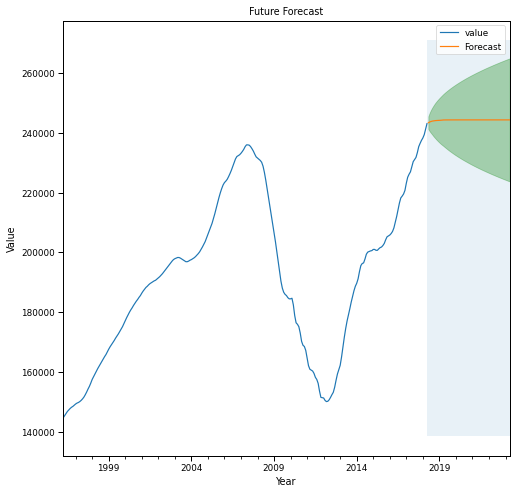

          Return at End of Forecast
forecast              244241.739191
upper                 264783.417399
lower                 223700.060984
                             value
best_case                 8.964369
predicted_percent_change  0.511004
worst_case               -7.942362


In [27]:
forecast_30017 = get_predictions(zip_30017, best_30017, steps=60, plot=True, show=True)

- We expect 0.5110 % return on our investment in 30017. 
- Best case scenario, we expect a 8.9644 % return on our investment in 30017. 
- Worst case scenario, we expect a -7.9424 % return on our investment in 30017.

### Zipcode 2: 30019

In [28]:
zip_30019 = gwinnett_grouped.loc[30019]
zip_30019.head()

,value
time,
1996-04-30,143200.0
1996-05-31,143500.0
1996-06-30,144000.0
1996-07-31,144600.0
1996-08-31,145200.0


In [29]:
zip_30019.tail()

,value
time,
2017-12-31,246800.0
2018-01-31,248100.0
2018-02-28,249400.0
2018-03-31,251000.0
2018-04-30,252400.0


In [30]:
stationarity_check_30019 = stationarity_check(zip_30019)


Results of Dickey-Fuller Test: 

Test Statistic                  -2.346363
p-value                          0.157451
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


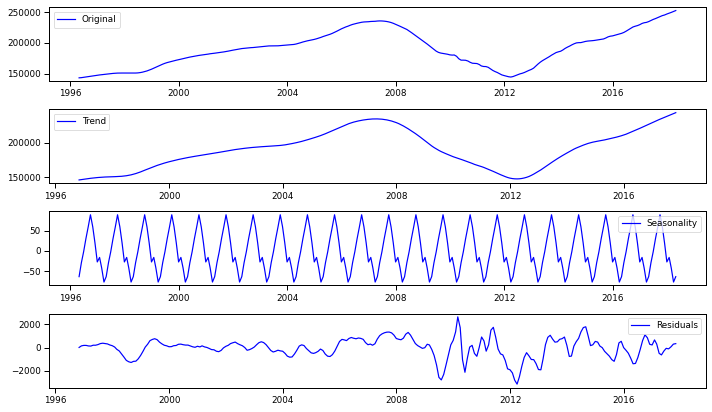

In [31]:
decomposition_30019 = decomposition(zip_30019)

In [32]:
stationarity_check_30019_residual = stationarity_check(residual(zip_30019))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.110594
p-value                          0.000930
#Lags Used                       8.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [33]:
best_30019 = best_parameters(zip_30019)

ARIMA (4, 1, 0) x (1, 0, 0, 12), AIC Calculated: 4512.537808712541
                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  265
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2250.269
Date:                            Sun, 22 May 2022   AIC                           4512.538
Time:                                    11:38:02   BIC                           4533.994
Sample:                                04-30-1996   HQIC                          4521.159
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0455      0.004     11.604    

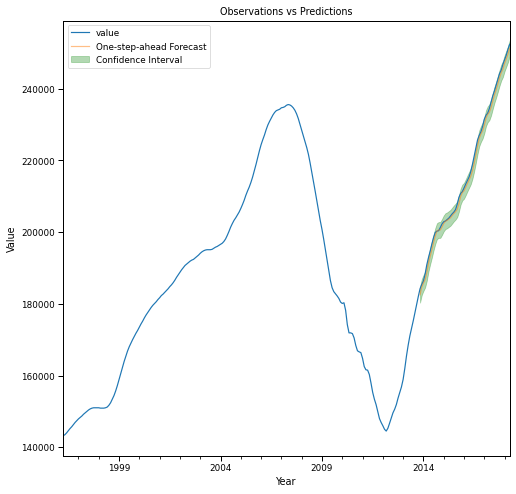

The RMSE of our forecast is 1182.92.



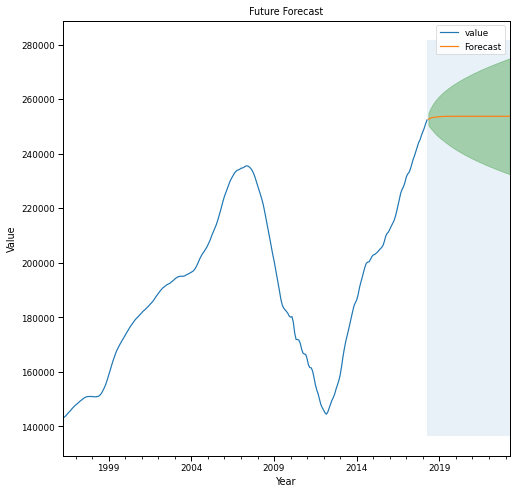

          Return at End of Forecast
forecast              253768.996200
upper                 275011.189802
lower                 232526.802599
                             value
best_case                 8.958475
predicted_percent_change  0.542392
worst_case               -7.873692


In [34]:
forecast_30019 = get_predictions(zip_30019, best_30019, steps=60, plot=True, show=True)

- We expect 0.5424 % return on our investment in 30019. 
- Best case scenario, we expect a 8.9585 % return on our investment in 30019. 
- Worst case scenario, we expect a -7.8737 % return on our investment in 30019.

### Zipcode 3: 30024

In [35]:
zip_30024 = gwinnett_grouped.loc[30024]
zip_30024.head()

,value
time,
1996-04-30,179600.0
1996-05-31,181000.0
1996-06-30,182400.0
1996-07-31,183900.0
1996-08-31,185200.0


In [36]:
zip_30024.tail()

,value
time,
2017-12-31,338600.0
2018-01-31,341300.0
2018-02-28,343200.0
2018-03-31,344900.0
2018-04-30,346300.0


In [37]:
stationarity_check_30024 = stationarity_check(zip_30024)


Results of Dickey-Fuller Test: 

Test Statistic                  -1.136239
p-value                          0.700406
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


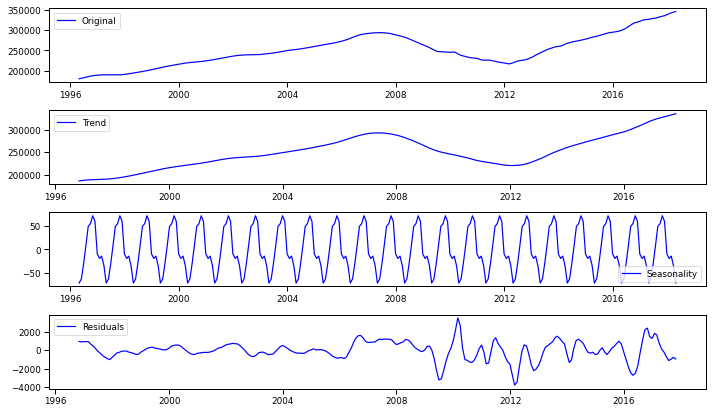

In [38]:
decomposition_30024 = decomposition(zip_30024)

In [39]:
stationarity_check_30024_residual = stationarity_check(residual(zip_30024))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.417594
p-value                          0.000276
#Lags Used                       7.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


In [40]:
best_30024 = best_parameters(zip_30024)

ARIMA (0, 2, 2) x (0, 0, 0, 12), AIC Calculated: 3931.994863833796
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(0, 2, 2)   Log Likelihood               -1962.997
Date:                Sun, 22 May 2022   AIC                           3931.995
Time:                        11:40:52   BIC                           3942.711
Sample:                    04-30-1996   HQIC                          3936.302
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0283      0.010      2.754      0.006       0.008       0.048
ma.L2         -0.0252      0.014     -1.788      0.074      -0.0

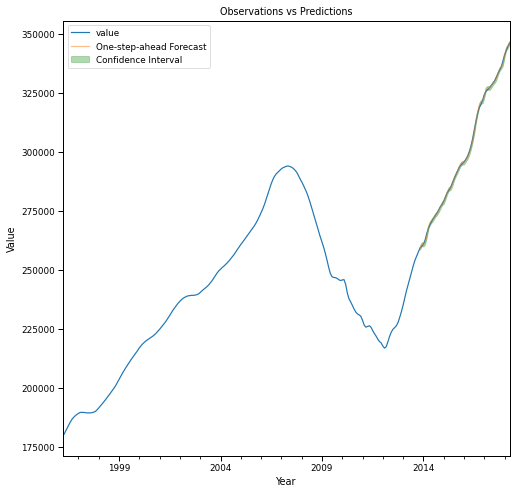

The RMSE of our forecast is 536.79.



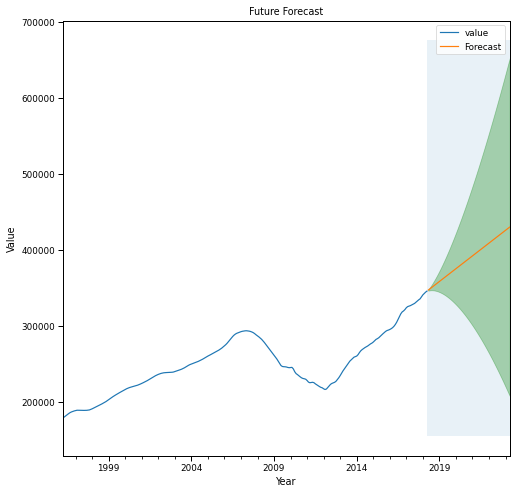

          Return at End of Forecast
forecast              430496.186171
upper                 652573.203207
lower                 208419.169134
                              value
best_case                 88.441583
predicted_percent_change  24.313077
worst_case               -39.815429


In [41]:
forecast_30024 = get_predictions(zip_30024, best_30024, steps=60, plot=True, show=True)

- We expect 24.3131 % return on our investment in 30024. 
- Best case scenario, we expect a 88.4416 % return on our investment in 30024. 
- Worst case scenario, we expect a -39.8154 % return on our investment in 30024

### Zipcode 4: 30039

In [42]:
zip_30039 = gwinnett_grouped.loc[30039]
zip_30039.head()

,value
time,
1996-04-30,123200.0
1996-05-31,124000.0
1996-06-30,124700.0
1996-07-31,125300.0
1996-08-31,125900.0


In [43]:
zip_30039.tail()

,value
time,
2017-12-31,175700.0
2018-01-31,177200.0
2018-02-28,178200.0
2018-03-31,179400.0
2018-04-30,180700.0


In [44]:
stationarity_check_30039 = stationarity_check(zip_30039)


Results of Dickey-Fuller Test: 

Test Statistic                  -2.515832
p-value                          0.111669
#Lags Used                       3.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


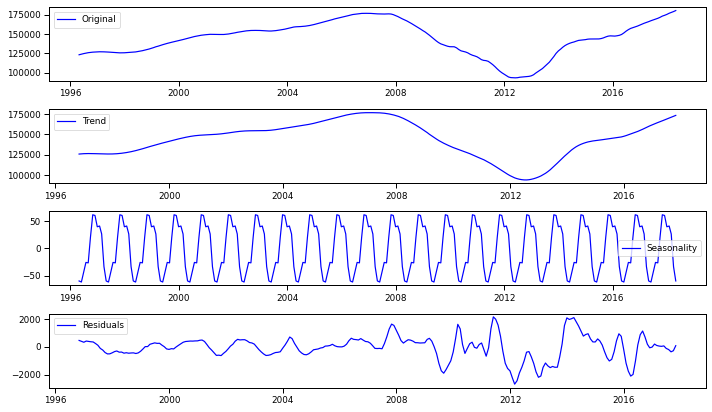

In [45]:
decomposition_30039 = decomposition(zip_30039)

In [46]:
stationarity_check_30039_residual = stationarity_check(residual(zip_30039))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.212286
p-value                          0.000628
#Lags Used                       5.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [47]:
best_30039 = best_parameters(zip_30039)

ARIMA (1, 1, 1) x (0, 0, 0, 12), AIC Calculated: 4374.821585157653
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2184.411
Date:                Sun, 22 May 2022   AIC                           4374.822
Time:                        11:56:04   BIC                           4385.549
Sample:                    04-30-1996   HQIC                          4379.132
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8923      0.015     59.613      0.000       0.863       0.922
ma.L1         -0.8213      0.018    -45.819      0.000      -0.8

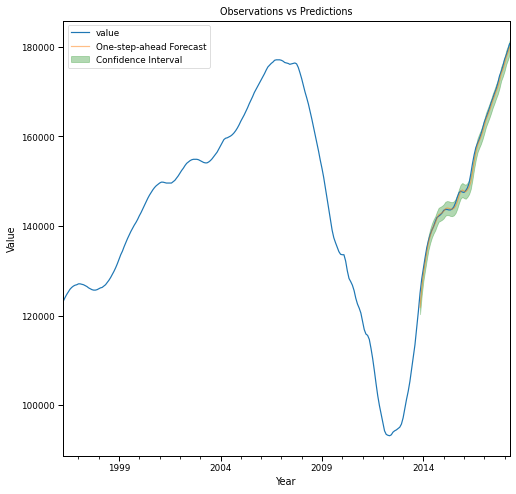

The RMSE of our forecast is 740.02.



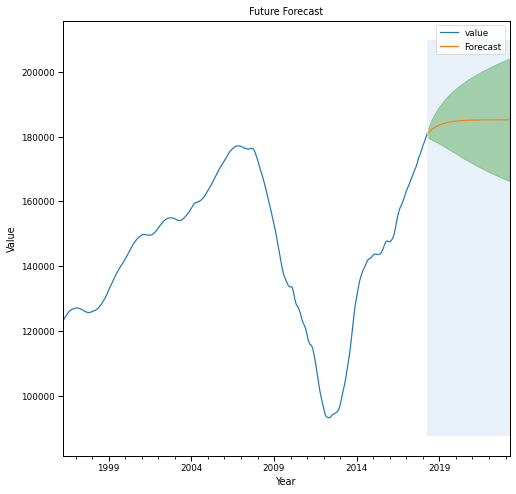

          Return at End of Forecast
forecast              185186.471163
upper                 204154.749391
lower                 166218.192935
                              value
best_case                 12.979939
predicted_percent_change   2.482829
worst_case                -8.014282


In [48]:
forecast_30039 = get_predictions(zip_30039, best_30039, steps=60, plot=True, show=True)

- We expect 2.4828 % return on our investment in 30039. 
- Best case scenario, we expect a 12.9799 % return on our investment in 30039. 
- Worst case scenario, we expect a -8.0143 % return on our investment in 30039.

### Zipcode 5: 30043

In [49]:
zip_30043 = gwinnett_grouped.loc[30043]
zip_30043.head()

,value
time,
1996-04-30,135200.0
1996-05-31,135500.0
1996-06-30,135800.0
1996-07-31,136000.0
1996-08-31,136200.0


In [50]:
zip_30043.tail()

,value
time,
2017-12-31,223700.0
2018-01-31,225500.0
2018-02-28,226700.0
2018-03-31,227800.0
2018-04-30,228800.0


In [51]:
stationarity_check_30043 = stationarity_check(zip_30043)


Results of Dickey-Fuller Test: 

Test Statistic                  -2.248530
p-value                          0.189105
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


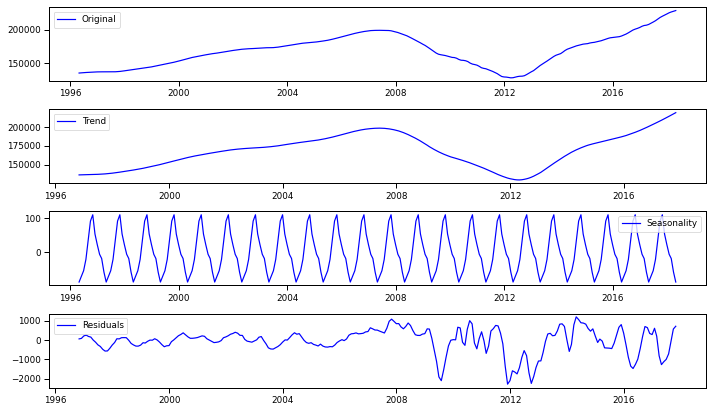

In [52]:
decomposition_30043 = decomposition(zip_30043)

In [53]:
stationarity_check_30043_residual = stationarity_check(residual(zip_30043))


Results of Dickey-Fuller Test: 

Test Statistic                  -3.463220
p-value                          0.008983
#Lags Used                       8.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [54]:
best_30043 = best_parameters(zip_30043)

ARIMA (4, 2, 0) x (0, 0, 0, 12), AIC Calculated: 3760.9445529310583
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(4, 2, 0)   Log Likelihood               -1875.472
Date:                Sun, 22 May 2022   AIC                           3760.945
Time:                        12:07:08   BIC                           3778.805
Sample:                    04-30-1996   HQIC                          3768.122
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0535      0.016      3.360      0.001       0.022       0.085
ar.L2         -0.0803      0.009     -8.536      0.000      -0.

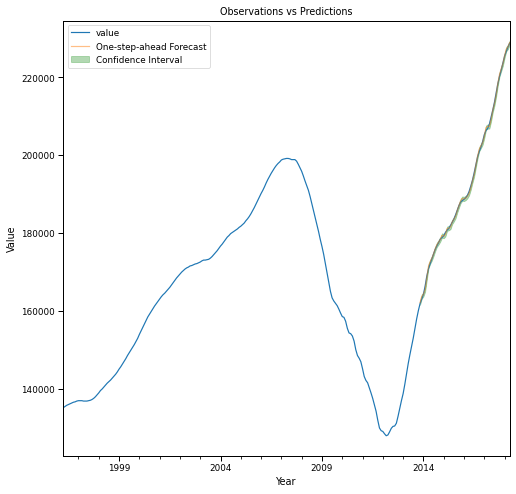

The RMSE of our forecast is 387.45.



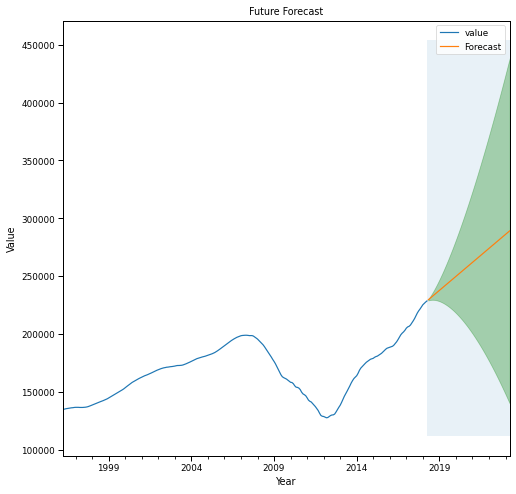

          Return at End of Forecast
forecast              289246.483255
upper                 438111.052876
lower                 140381.913635
                              value
best_case                 91.482104
predicted_percent_change  26.418918
worst_case               -38.644269


In [55]:
forecast_30043 = get_predictions(zip_30043, best_30043, steps=60, plot=True, show=True)

- We expect 26.4189 % return on our investment in 30043. 
- Best case scenario, we expect a 91.4821 % return on our investment in 30043. 
- Worst case scenario, we expect a -38.6443 % return on our investment in 30043.

### Zipcode 6: 30044

In [56]:
zip_30044 = gwinnett_grouped.loc[30044]
zip_30044.head()

,value
time,
1996-04-30,111400.0
1996-05-31,111800.0
1996-06-30,112200.0
1996-07-31,112500.0
1996-08-31,112900.0


In [57]:
zip_30044.tail()

,value
time,
2017-12-31,178500.0
2018-01-31,180100.0
2018-02-28,181000.0
2018-03-31,182200.0
2018-04-30,183400.0


In [58]:
stationarity_check_30044 = stationarity_check(zip_30044)


Results of Dickey-Fuller Test: 

Test Statistic                  -2.429214
p-value                          0.133660
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


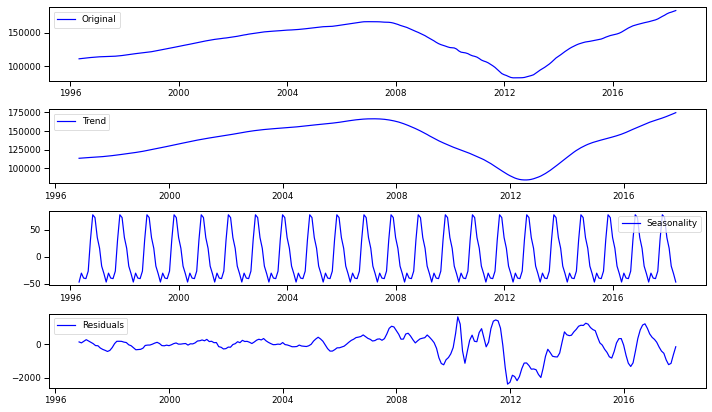

In [59]:
decomposition_30044 = decomposition(zip_30044)

In [60]:
stationarity_check_30044_residual = stationarity_check(residual(zip_30044))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.480545
p-value                          0.000213
#Lags Used                      16.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [61]:
best_30044 = best_parameters(zip_30044)

ARIMA (4, 0, 0) x (0, 0, 2, 12), AIC Calculated: 4193.696226406285
                                        SARIMAX Results                                        
Dep. Variable:                                   value   No. Observations:                  265
Model:             SARIMAX(4, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood               -2089.848
Date:                                 Sun, 22 May 2022   AIC                           4193.696
Time:                                         12:15:11   BIC                           4218.754
Sample:                                     04-30-1996   HQIC                          4203.764
                                          - 04-30-2018                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1  

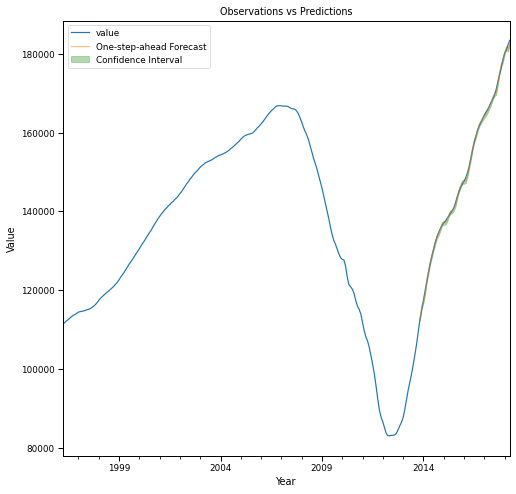

The RMSE of our forecast is 554.57.



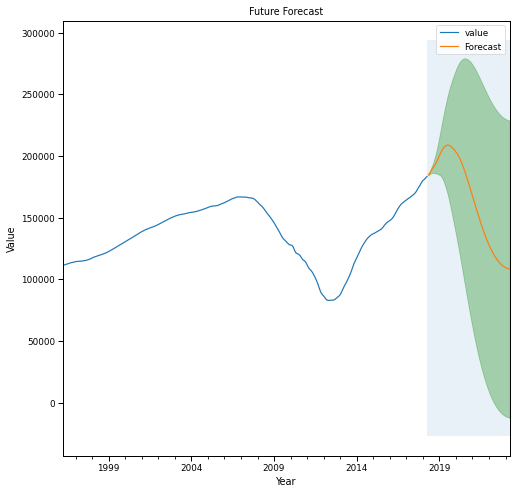

          Return at End of Forecast
forecast              108286.888142
upper                 228745.069882
lower                 -12171.293598
                               value
best_case                  24.724684
predicted_percent_change  -40.955895
worst_case               -106.636474


In [62]:
forecast_30044 = get_predictions(zip_30044, best_30044, steps=60, plot=True, show=True)

- We expect -40.9559 % return on our investment in 30044. 
- Best case scenario, we expect a 24.7247 % return on our investment in 30044. 
- Worst case scenario, we expect a -106.6365 % return on our investment in 30044.

### Zipcode 7: 30045

In [63]:
zip_30045 = gwinnett_grouped.loc[30045]
zip_30045.head()

,value
time,
1996-04-30,128000.0
1996-05-31,128500.0
1996-06-30,129100.0
1996-07-31,129900.0
1996-08-31,130600.0


In [64]:
zip_30045.tail()

,value
time,
2017-12-31,201400.0
2018-01-31,203400.0
2018-02-28,205200.0
2018-03-31,207400.0
2018-04-30,209300.0


In [65]:
stationarity_check_30045 = stationarity_check(zip_30045)


Results of Dickey-Fuller Test: 

Test Statistic                  -1.525352
p-value                          0.520935
#Lags Used                       9.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


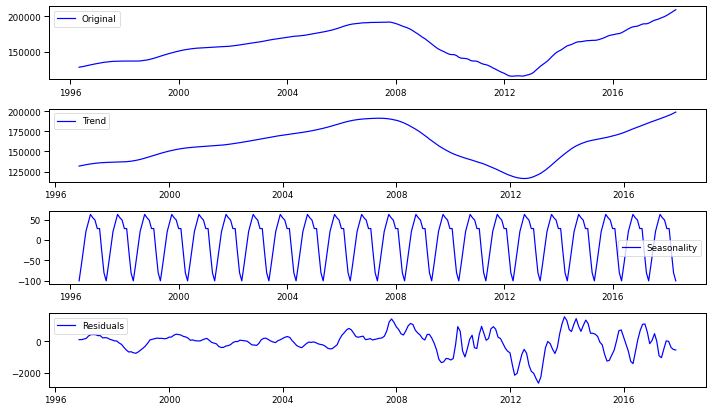

In [66]:
decomposition_30045 = decomposition(zip_30045)

In [67]:
stationarity_check_30045_residual = stationarity_check(residual(zip_30045))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.762963
p-value                          0.000064
#Lags Used                      11.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


In [68]:
best_30045 = best_parameters(zip_30045)

ARIMA (3, 2, 0) x (0, 0, 0, 12), AIC Calculated: 3808.1080538654137
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1900.054
Date:                Sun, 22 May 2022   AIC                           3808.108
Time:                        12:18:02   BIC                           3822.397
Sample:                    04-30-1996   HQIC                          3813.850
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0392      0.015      2.600      0.009       0.010       0.069
ar.L2         -0.1119      0.010    -10.822      0.000      -0.

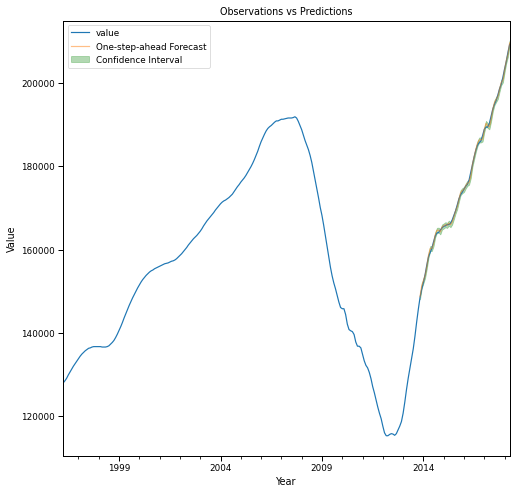

The RMSE of our forecast is 463.38.



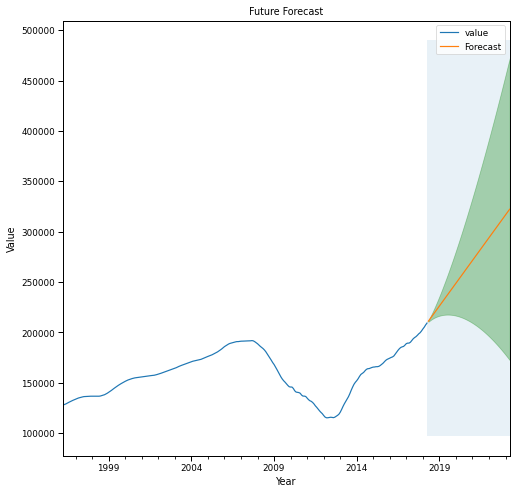

          Return at End of Forecast
forecast              322294.150997
upper                 472052.087801
lower                 172536.214193
                               value
best_case                 125.538503
predicted_percent_change   53.986694
worst_case                -17.565115


In [69]:
forecast_30045 = get_predictions(zip_30045, best_30045, steps=60, plot=True, show=True)

- We expect 53.9867 % return on our investment in 30045. 
- Best case scenario, we expect a 125.5385 % return on our investment in 30045. 
- Worst case scenario, we expect a -17.5651 % return on our investment in 30045.

### Zipcode 8: 30046

In [70]:
zip_30046 = gwinnett_grouped.loc[30046]
zip_30046.head()

,value
time,
1996-04-30,97800.0
1996-05-31,98000.0
1996-06-30,98200.0
1996-07-31,98500.0
1996-08-31,98700.0


In [71]:
zip_30046.tail()

,value
time,
2017-12-31,167500.0
2018-01-31,169800.0
2018-02-28,171100.0
2018-03-31,172000.0
2018-04-30,172400.0


In [72]:
stationarity_check_30046 = stationarity_check(zip_30046)


Results of Dickey-Fuller Test: 

Test Statistic                  -2.578567
p-value                          0.097508
#Lags Used                       9.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


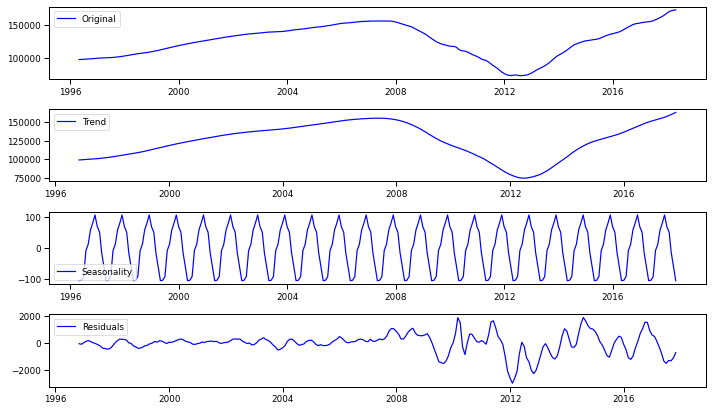

In [73]:
decomposition_30046 = decomposition(zip_30046)

In [74]:
stationarity_check_30046_residual = stationarity_check(residual(zip_30046))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.327920
p-value                          0.000397
#Lags Used                       8.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [75]:
best_30046= best_parameters(zip_30046)

ARIMA (2, 2, 0) x (1, 0, 1, 12), AIC Calculated: 3786.263253446257
                                      SARIMAX Results                                       
Dep. Variable:                                value   No. Observations:                  265
Model:             SARIMAX(2, 2, 0)x(1, 0, [1], 12)   Log Likelihood               -1888.132
Date:                              Sun, 22 May 2022   AIC                           3786.263
Time:                                      12:26:37   BIC                           3804.124
Sample:                                  04-30-1996   HQIC                          3793.441
                                       - 04-30-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0992      0.01

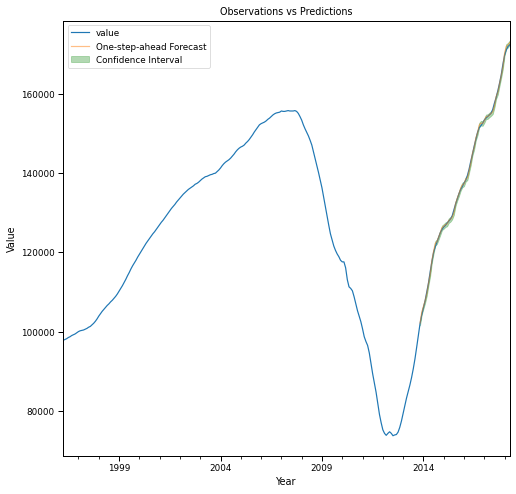

The RMSE of our forecast is 419.92.



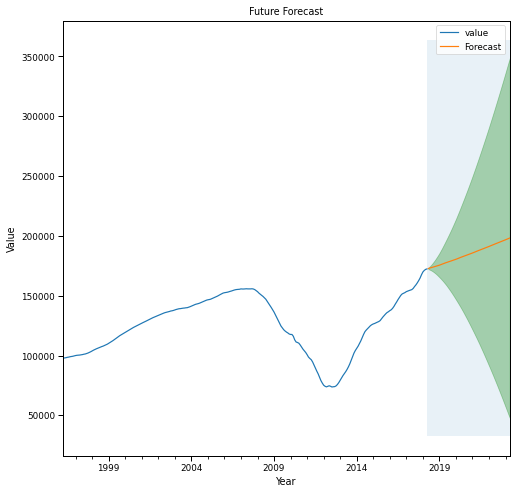

          Return at End of Forecast
forecast              198195.334282
upper                 348418.839272
lower                  47971.829292
                               value
best_case                 102.099095
predicted_percent_change   14.962491
worst_case                -72.174113


In [76]:
forecast_30046 = get_predictions(zip_30046, best_30046, steps=60, plot=True, show=True)

- We expect 14.9625 % return on our investment in 30046. 
- Best case scenario, we expect a 102.0991 % return on our investment in 30046. 
- Worst case scenario, we expect a -72.1741 % return on our investment in 30046.

### Zipcode 9: 30047

In [77]:
zip_30047 = gwinnett_grouped.loc[30047]
zip_30047.head()

,value
time,
1996-04-30,123800.0
1996-05-31,124100.0
1996-06-30,124300.0
1996-07-31,124600.0
1996-08-31,124900.0


In [78]:
zip_30047.tail()

,value
time,
2017-12-31,200900.0
2018-01-31,202500.0
2018-02-28,204300.0
2018-03-31,206600.0
2018-04-30,208400.0


In [79]:
stationarity_check_30047 = stationarity_check(zip_30047)


Results of Dickey-Fuller Test: 

Test Statistic                  -2.031025
p-value                          0.273137
#Lags Used                       3.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


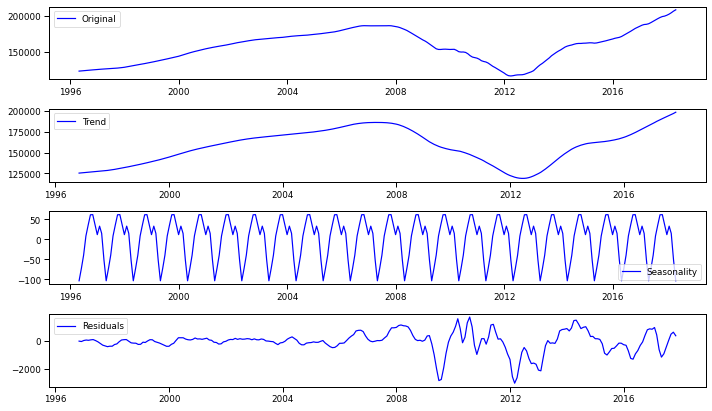

In [80]:
decomposition_30047 = decomposition(zip_30047)

In [81]:
stationarity_check_30047_residual = stationarity_check(residual(zip_30047))


Results of Dickey-Fuller Test: 

Test Statistic                  -5.382185
p-value                          0.000004
#Lags Used                       3.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [82]:
best_30047 = best_parameters(zip_30047)

ARIMA (4, 2, 2) x (0, 0, 0, 12), AIC Calculated: 3798.5877239196807
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(4, 2, 2)   Log Likelihood               -1892.294
Date:                Sun, 22 May 2022   AIC                           3798.588
Time:                        12:33:55   BIC                           3823.593
Sample:                    04-30-1996   HQIC                          3808.637
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9656      0.059     16.280      0.000       0.849       1.082
ar.L2         -1.0834      0.058    -18.590      0.000      -1.

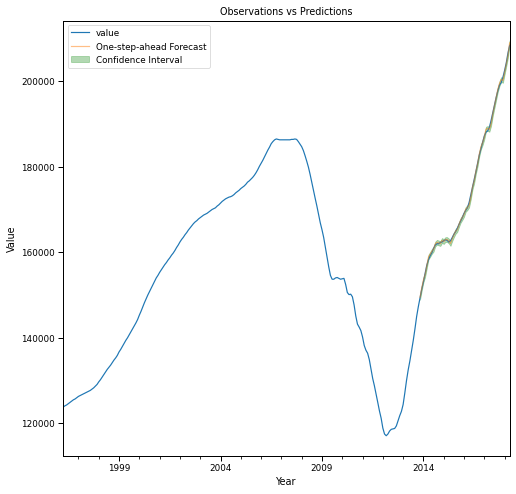

The RMSE of our forecast is 469.92.



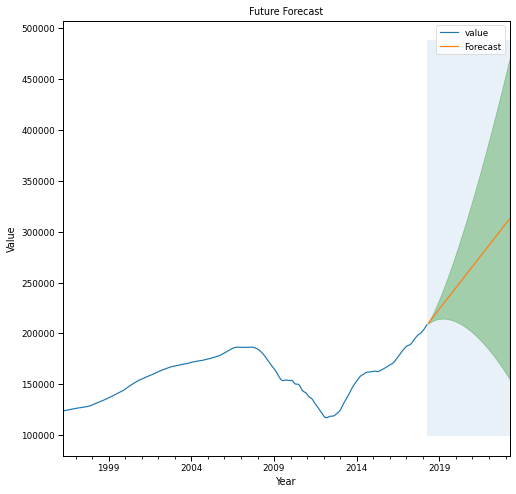

          Return at End of Forecast
forecast              312667.072882
upper                 470280.522080
lower                 155053.623684
                               value
best_case                 125.662439
predicted_percent_change   50.032185
worst_case                -25.598069


In [83]:
forecast_30047 = get_predictions(zip_30047, best_30047, steps=60, plot=True, show=True)

- We expect 50.0322 % return on our investment in 30047. 
- Best case scenario, we expect a 125.6624 % return on our investment in 30047. 
- Worst case scenario, we expect a -25.5981 % return on our investment in 30047.

### Zipcode 10: 30052

In [84]:
zip_30052 = gwinnett_grouped.loc[30052]
zip_30052.head()

,value
time,
1996-04-30,114900.0
1996-05-31,115800.0
1996-06-30,116600.0
1996-07-31,117300.0
1996-08-31,117800.0


In [85]:
zip_30052.tail()

,value
time,
2017-12-31,192400.0
2018-01-31,194100.0
2018-02-28,195400.0
2018-03-31,197000.0
2018-04-30,198500.0


In [86]:
stationarity_check_30052 = stationarity_check(zip_30052)


Results of Dickey-Fuller Test: 

Test Statistic                  -1.932226
p-value                          0.317056
#Lags Used                       4.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64


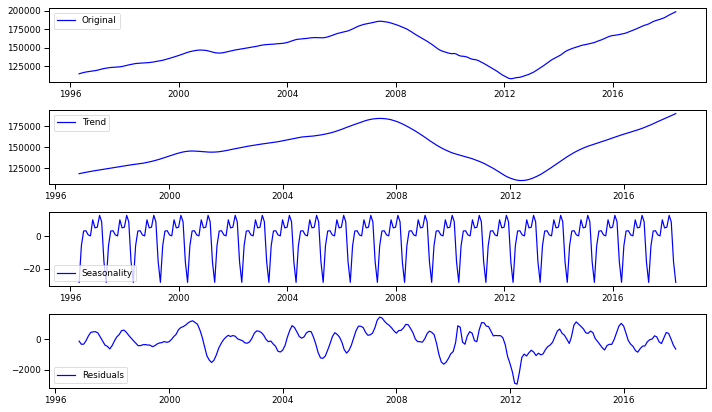

In [87]:
decomposition_30052 = decomposition(zip_30052)

In [88]:
stationarity_check_30052_residual = stationarity_check(residual(zip_30052))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.731770
p-value                          0.000073
#Lags Used                       4.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [89]:
best_30052 = best_parameters(zip_30052)

ARIMA (1, 1, 1) x (0, 0, 0, 12), AIC Calculated: 4295.5384052677055
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2144.769
Date:                Sun, 22 May 2022   AIC                           4295.538
Time:                        12:37:21   BIC                           4306.266
Sample:                    04-30-1996   HQIC                          4299.849
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9144      0.010     88.206      0.000       0.894       0.935
ma.L1         -0.8268      0.014    -59.813      0.000      -0.

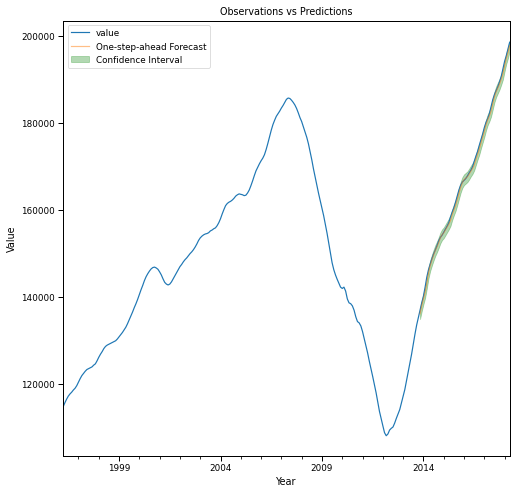

The RMSE of our forecast is 761.45.



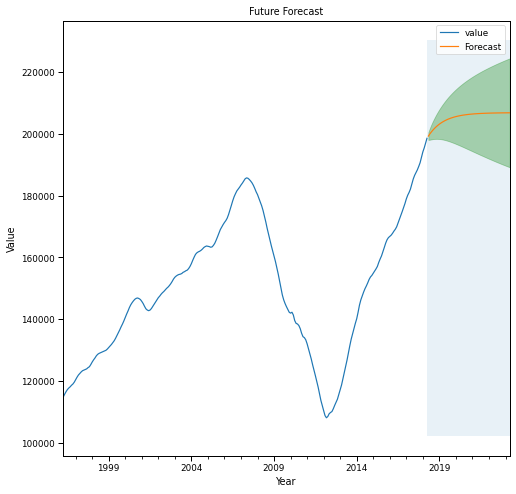

          Return at End of Forecast
forecast              206735.668147
upper                 224326.413146
lower                 189144.923148
                              value
best_case                 13.010787
predicted_percent_change   4.148951
worst_case                -4.712885


In [90]:
forecast_30052 = get_predictions(zip_30052, best_30052, steps=60, plot=True, show=True)

- We expect 4.1490 % return on our investment in 30052.
- Best case scenario, we expect a 13.0108 % return on our investment in 30052.
- Worst case scenario, we expect a -4.7129 % return on our investment in 30052.

### Zipcode 11: 30078

In [91]:
zip_30078 = gwinnett_grouped.loc[30078]
zip_30078.head()

,value
time,
1996-04-30,121700.0
1996-05-31,122200.0
1996-06-30,122700.0
1996-07-31,123100.0
1996-08-31,123500.0


In [92]:
zip_30078.tail()

,value
time,
2017-12-31,190900.0
2018-01-31,192500.0
2018-02-28,193500.0
2018-03-31,194800.0
2018-04-30,196300.0


In [93]:
stationarity_check_30078 = stationarity_check(zip_30078)


Results of Dickey-Fuller Test: 

Test Statistic                  -1.883696
p-value                          0.339769
#Lags Used                       5.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64


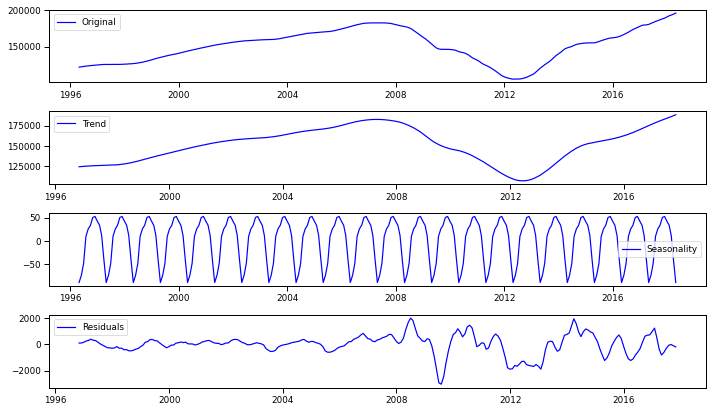

In [94]:
decomposition_30078 = decomposition(zip_30078)

In [95]:
stationarity_check_30078_residual = stationarity_check(residual(zip_30078))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.909788
p-value                          0.000033
#Lags Used                       9.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


In [96]:
best_30078 = best_parameters(zip_30078)

ARIMA (1, 1, 1) x (1, 0, 0, 12), AIC Calculated: 4353.445951095771
                                      SARIMAX Results                                      
Dep. Variable:                               value   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -2172.723
Date:                             Sun, 22 May 2022   AIC                           4353.446
Time:                                     12:41:20   BIC                           4367.750
Sample:                                 04-30-1996   HQIC                          4359.194
                                      - 04-30-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9075      0.014     64

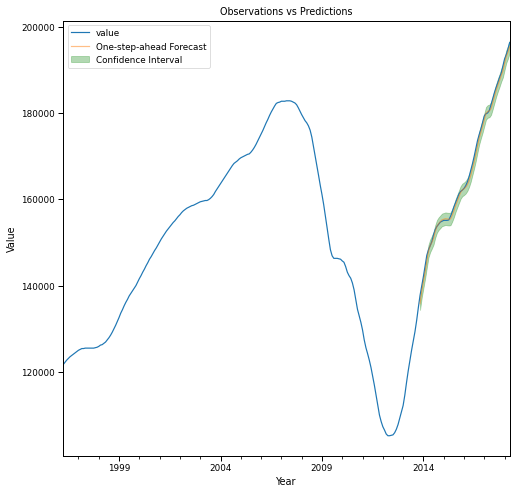

The RMSE of our forecast is 771.04.



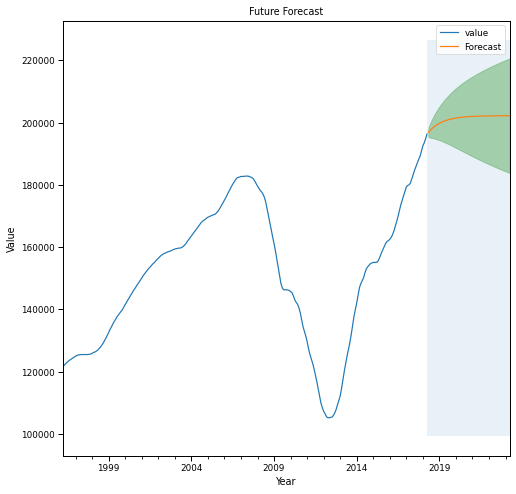

          Return at End of Forecast
forecast              202201.341482
upper                 220615.857620
lower                 183786.825345
                              value
best_case                 12.387090
predicted_percent_change   3.006287
worst_case                -6.374516


In [97]:
forecast_30078 = get_predictions(zip_30078, best_30078, steps=60, plot=True, show=True)

- We expect 3.0063 % return on our investment in 30078. 
- Best case scenario, we expect a 12.3871 % return on our investment in 30078. 
- Worst case scenario, we expect a -6.3745 % return on our investment in 30078.

### Zipcode 12: 30092

In [98]:
zip_30092 = gwinnett_grouped.loc[30092]
zip_30092.head()

,value
time,
1996-04-30,188800.0
1996-05-31,189400.0
1996-06-30,190000.0
1996-07-31,190600.0
1996-08-31,191200.0


In [99]:
zip_30092.tail()

,value
time,
2017-12-31,361700.0
2018-01-31,363600.0
2018-02-28,364800.0
2018-03-31,366300.0
2018-04-30,367900.0


In [100]:
stationarity_check_30092 = stationarity_check(zip_30092)


Results of Dickey-Fuller Test: 

Test Statistic                  -1.442270
p-value                          0.561852
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


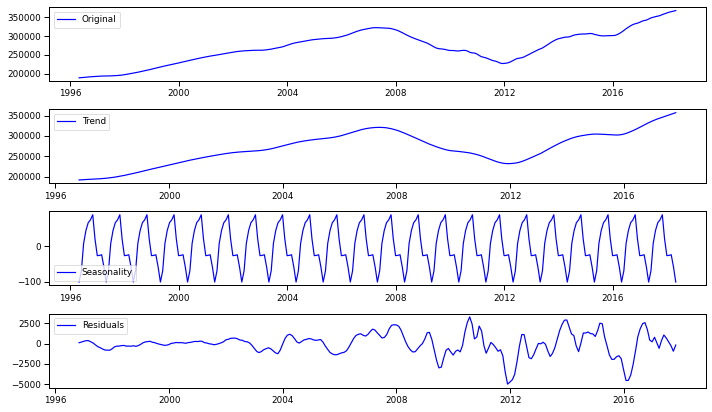

In [101]:
decomposition_30092 = decomposition(zip_30092)

In [102]:
stationarity_check_30092_residual = stationarity_check(residual(zip_30092))


Results of Dickey-Fuller Test: 

Test Statistic                  -5.513798
p-value                          0.000002
#Lags Used                       8.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [103]:
best_30092 = best_parameters(zip_30092)

ARIMA (3, 1, 1) x (0, 0, 0, 12), AIC Calculated: 4645.410794305312
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -2317.705
Date:                Sun, 22 May 2022   AIC                           4645.411
Time:                        12:49:44   BIC                           4663.291
Sample:                    04-30-1996   HQIC                          4652.595
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9809      0.020     47.951      0.000       0.941       1.021
ar.L2         -0.0025      0.007     -0.382      0.703      -0.0

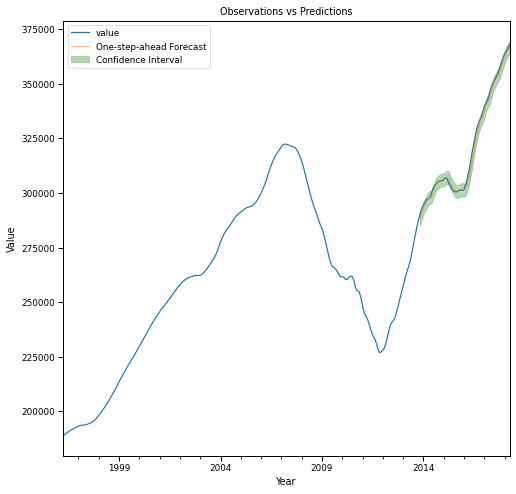

The RMSE of our forecast is 1456.29.



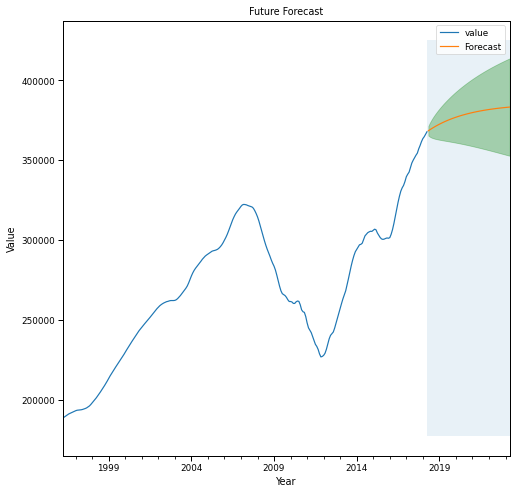

          Return at End of Forecast
forecast              383353.025050
upper                 413861.902480
lower                 352844.147619
                              value
best_case                 12.493042
predicted_percent_change   4.200333
worst_case                -4.092376


In [104]:
forecast_30092 = get_predictions(zip_30092, best_30092, steps=60, plot=True, show=True)

- We expect 4.2003 % return on our investment in 30092. 
- Best case scenario, we expect a 12.4930 % return on our investment in 30092. 
- Worst case scenario, we expect a -4.0924 % return on our investment in 30092.

### Zipcode 13: 30096

In [105]:
zip_30096 = gwinnett_grouped.loc[30096]
zip_30096.head()

,value
time,
1996-04-30,119700.0
1996-05-31,120000.0
1996-06-30,120300.0
1996-07-31,120700.0
1996-08-31,121000.0


In [106]:
zip_30096.tail()

,value
time,
2017-12-31,214600.0
2018-01-31,216500.0
2018-02-28,218100.0
2018-03-31,219800.0
2018-04-30,221100.0


In [107]:
stationarity_check_30096 = stationarity_check(zip_30096)


Results of Dickey-Fuller Test: 

Test Statistic                  -1.270647
p-value                          0.642492
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


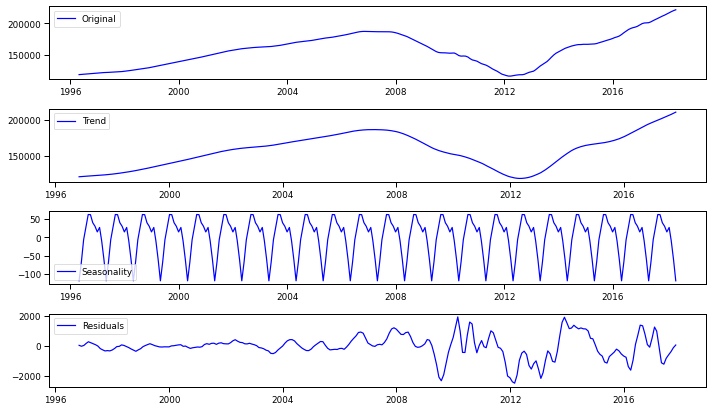

In [108]:
decomposition_30096 = decomposition(zip_30096)

In [109]:
stationarity_check_30096_residual = stationarity_check(residual(zip_30096))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.807346
p-value                          0.000053
#Lags Used                      16.000000
Number of Observations Used    236.000000
Critical Value (1%)             -3.458366
Critical Value (5%)             -2.873866
Critical Value (10%)            -2.573339
dtype: float64


In [110]:
best_30096 = best_parameters(zip_30096)

ARIMA (3, 2, 0) x (0, 0, 0, 12), AIC Calculated: 3832.965299072866
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(3, 2, 0)   Log Likelihood               -1912.483
Date:                Sun, 22 May 2022   AIC                           3832.965
Time:                        12:57:05   BIC                           3847.254
Sample:                    04-30-1996   HQIC                          3838.708
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0680      0.013      5.200      0.000       0.042       0.094
ar.L2         -0.1058      0.010    -10.352      0.000      -0.1

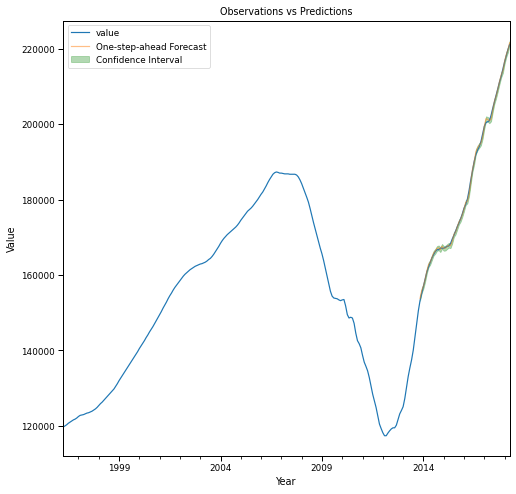

The RMSE of our forecast is 440.86.



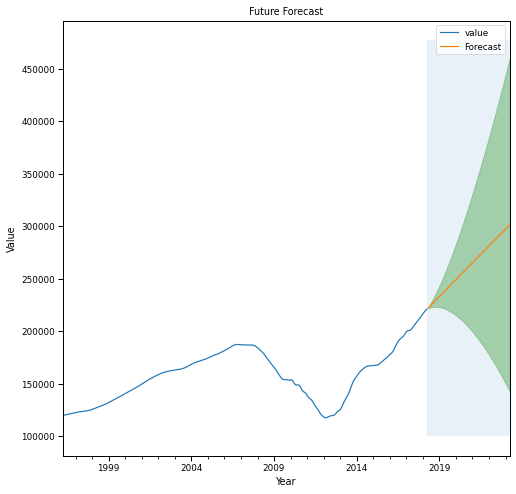

          Return at End of Forecast
forecast              301307.913081
upper                 460028.746948
lower                 142587.079213
                               value
best_case                 108.063658
predicted_percent_change   36.276759
worst_case                -35.510141


In [111]:
forecast_30096 = get_predictions(zip_30096, best_30096, steps=60, plot=True, show=True)

- We expect 36.2768 % return on our investment in 30096. 
- Best case scenario, we expect a 108.0637 % return on our investment in 30096. 
- Worst case scenario, we expect a -35.5101 % return on our investment in 30096.

### Zipcode 14: 30097

In [112]:
zip_30097 = gwinnett_grouped.loc[30097]
zip_30097.head()

,value
time,
1996-04-30,217800.0
1996-05-31,217500.0
1996-06-30,217400.0
1996-07-31,217700.0
1996-08-31,218400.0


In [113]:
zip_30097.tail()

,value
time,
2017-12-31,405500.0
2018-01-31,407700.0
2018-02-28,409600.0
2018-03-31,411000.0
2018-04-30,411700.0


In [114]:
stationarity_check_30097 = stationarity_check(zip_30097)


Results of Dickey-Fuller Test: 

Test Statistic                  -2.005004
p-value                          0.284384
#Lags Used                      13.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


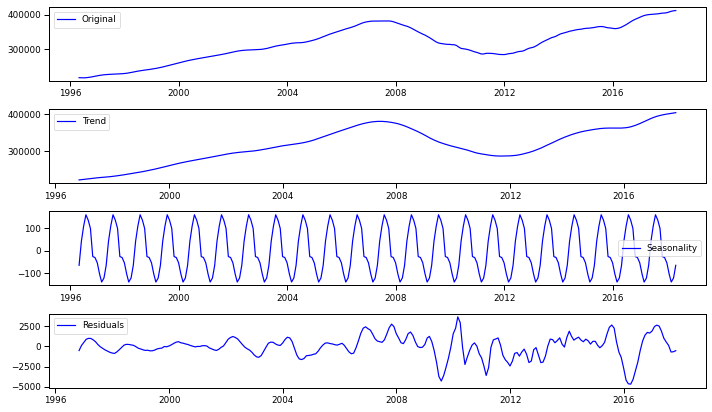

In [115]:
decomposition_30097 = decomposition(zip_30097)

In [116]:
stationarity_check_30097_residual = stationarity_check(residual(zip_30097))


Results of Dickey-Fuller Test: 

Test Statistic                  -3.614318
p-value                          0.005493
#Lags Used                      13.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [117]:
best_30097 = best_parameters(zip_30097)

ARIMA (1, 1, 0) x (0, 0, 0, 12), AIC Calculated: 4717.005348305096
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2356.503
Date:                Sun, 22 May 2022   AIC                           4717.005
Time:                        13:00:00   BIC                           4724.157
Sample:                    04-30-1996   HQIC                          4719.879
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0280      0.004      7.115      0.000       0.020       0.036
sigma2      3.275e+06   4.23e-12   7.74e+17      0.000    3.28e+

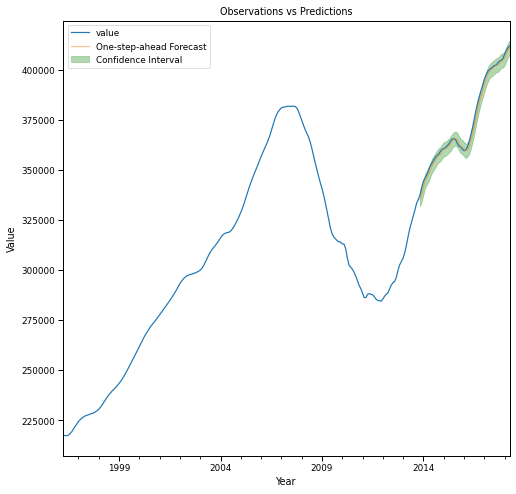

The RMSE of our forecast is 1383.45.



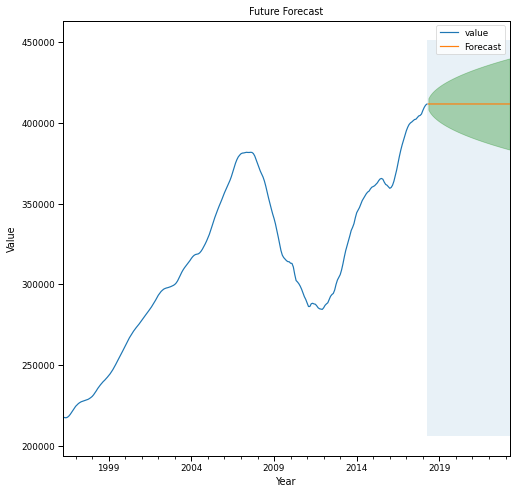

          Return at End of Forecast
forecast              411720.143963
upper                 439972.806647
lower                 383467.481280
                             value
best_case                 6.867332
predicted_percent_change  0.004893
worst_case               -6.857546


In [118]:
forecast_30097 = get_predictions(zip_30097, best_30097, steps=60, plot=True, show=True)

- We expect 0.005 % return on our investment in 30097. 
- Best case scenario, we expect a 6.8673 % return on our investment in 30097. 
- Worst case scenario, we expect a -6.8575 % return on our investment in 30097.

### Zipcode 15: 30518

In [119]:
zip_30518 = gwinnett_grouped.loc[30518]
zip_30518.head()

,value
time,
1996-04-30,121500.0
1996-05-31,121900.0
1996-06-30,122500.0
1996-07-31,123000.0
1996-08-31,123600.0


In [120]:
zip_30518.tail()

,value
time,
2017-12-31,231000.0
2018-01-31,233300.0
2018-02-28,235500.0
2018-03-31,237600.0
2018-04-30,239400.0


In [121]:
stationarity_check_30518 = stationarity_check(zip_30518)


Results of Dickey-Fuller Test: 

Test Statistic                  -1.036443
p-value                          0.739741
#Lags Used                       8.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


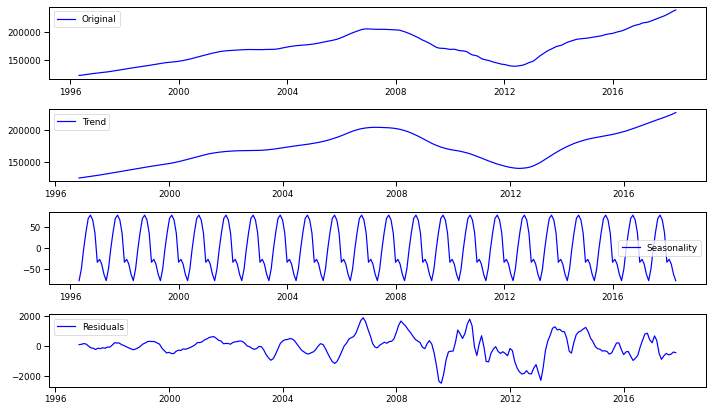

In [122]:
decomposition_30518 = decomposition(zip_30518)

In [123]:
stationarity_check_30518_residual = stationarity_check(residual(zip_30518))


Results of Dickey-Fuller Test: 

Test Statistic                  -5.552267
p-value                          0.000002
#Lags Used                       3.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [124]:
best_30518 = best_parameters(zip_30518)

ARIMA (1, 1, 1) x (0, 0, 0, 12), AIC Calculated: 4359.435857507928
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  265
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2176.718
Date:                Sun, 22 May 2022   AIC                           4359.436
Time:                        13:04:46   BIC                           4370.164
Sample:                    04-30-1996   HQIC                          4363.747
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9304      0.012     75.323      0.000       0.906       0.955
ma.L1         -0.8708      0.016    -56.099      0.000      -0.9

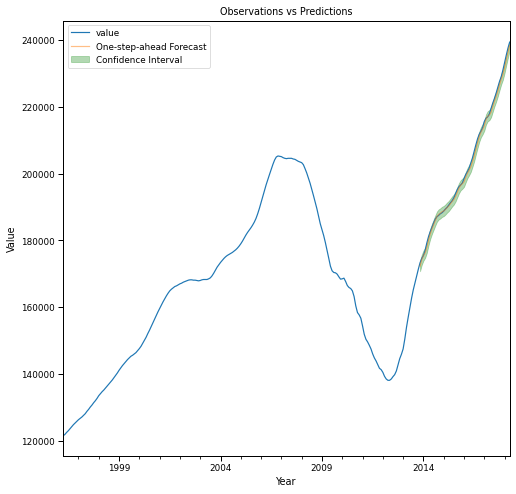

The RMSE of our forecast is 1064.28.



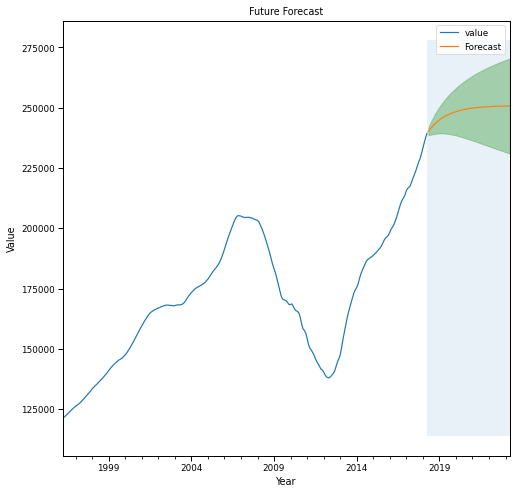

          Return at End of Forecast
forecast              250774.661754
upper                 270498.103495
lower                 231051.220013
                              value
best_case                 12.990018
predicted_percent_change   4.751321
worst_case                -3.487377


In [125]:
forecast_30518 = get_predictions(zip_30518, best_30518, steps=60, plot=True, show=True)

- We expect 4.7513 % return on our investment in 30518. 
- Best case scenario, we expect a 12.9900 % return on our investment in 30518. 
- Worst case scenario, we expect a -3.4874 % return on our investment in 30518.

### Zipcode 16: 30519

In [126]:
zip_30519 = gwinnett_grouped.loc[30519]
zip_30519.head()

,value
time,
1996-04-30,133400.0
1996-05-31,133800.0
1996-06-30,134300.0
1996-07-31,134900.0
1996-08-31,135600.0


In [127]:
zip_30519.tail()

,value
time,
2017-12-31,234200.0
2018-01-31,236000.0
2018-02-28,237000.0
2018-03-31,238100.0
2018-04-30,239400.0


In [128]:
stationarity_check_30519 = stationarity_check(zip_30519)


Results of Dickey-Fuller Test: 

Test Statistic                  -2.221676
p-value                          0.198473
#Lags Used                       3.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (5%)             -2.872678
Critical Value (10%)            -2.572705
dtype: float64


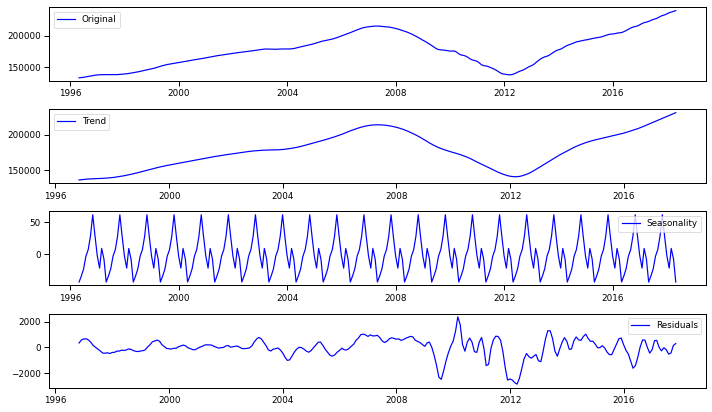

In [129]:
decomposition_30519 = decomposition(zip_30519)

In [130]:
stationarity_check_30519_residual = stationarity_check(residual(zip_30519))


Results of Dickey-Fuller Test: 

Test Statistic                  -4.134216
p-value                          0.000850
#Lags Used                       8.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [131]:
best_30519 = best_parameters(zip_30519)

ARIMA (4, 1, 0) x (1, 0, 0, 12), AIC Calculated: 4433.844772054615
                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  265
Model:             SARIMAX(4, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2210.922
Date:                            Sun, 22 May 2022   AIC                           4433.845
Time:                                    13:50:49   BIC                           4455.300
Sample:                                04-30-1996   HQIC                          4442.466
                                     - 04-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0543      0.004     14.321    

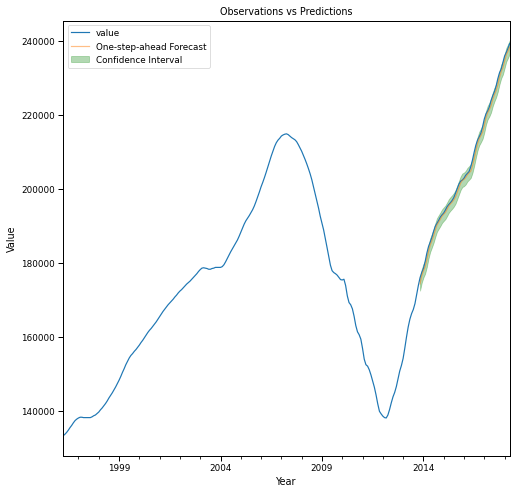

The RMSE of our forecast is 1137.1.



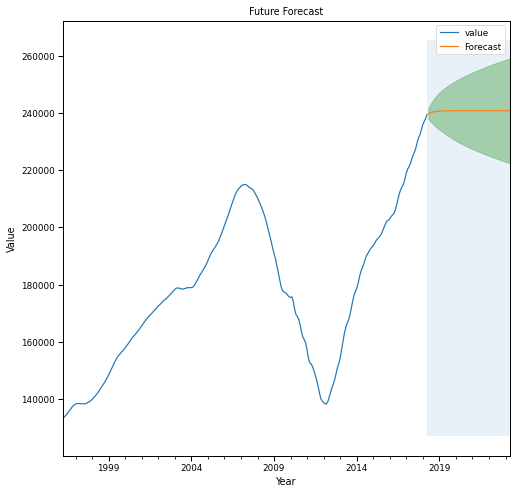

          Return at End of Forecast
forecast              240759.819738
upper                 259082.087483
lower                 222437.551993
                             value
best_case                 8.221423
predicted_percent_change  0.568012
worst_case               -7.085400


In [132]:
forecast_30519 = get_predictions(zip_30519, best_30519, steps=60, plot=True, show=True)

- We expect 0.5680 % return on our investment in 30519. 
- Best case scenario, we expect a 8.2214 % return on our investment in 30519. 
- Worst case scenario, we expect a -7.0854 % return on our investment in 30519.

## 4. Conclusion

Here are the top 5 zipcodes ranked by highest ROI:

- 30045
- 30047
- 30096
- 30043
- 30024